In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [199]:
#Import Data and separate columns into two, separate arrays
Excel = pd.read_excel("C:/Users/thund/Downloads/Surgery Practice 1.xlsx")
Excel
stocks = Excel["S&P"].to_numpy()
portfolio = Excel["Portfolio"].to_numpy()
stocks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [200]:
#Generate Call and Put Options
call = np.zeros((60, 3))  # 60x3 matrix for call payoffs (60 stock prices and 3 strike prices)
put = np.zeros((60, 2))   # 60x2 matrix for put payoffs

In [201]:
#Populate Payoffs
for i in range(60):
    for j in range(1,4):
        call[i,j-1] = max(stocks[i]-(j * 15),0)

for i in range(60):
    for j in range(3,5):
        put[i,j-3] = max((j * 5)-stocks[i],0)

In [202]:
#Negative portfolio and create X matrix for regression
neg_portfolio = np.minimum(portfolio,0)
X = np.hstack([call, put])

In [212]:
#Regress against negative portion of the portfolio (b keeps equaling zero??)
model = LinearRegression(fit_intercept=False)
model.fit(X,neg_portfolio)
b = model.coef_.reshape(-1, 1)
b #b[0], b[1], b[2] correspond to calls with strikes 15, 30, and 45. b[3] and b[4] correspond to puts with strike of 15 and 20, respectively.


array([[-206.60567508],
       [ 440.49083973],
       [-273.48442368],
       [ -46.98010183],
       [  30.96415802]])

In [219]:
#Hedged portfolio
option_payoff = X @ b
after_surgery = portfolio - option_payoff

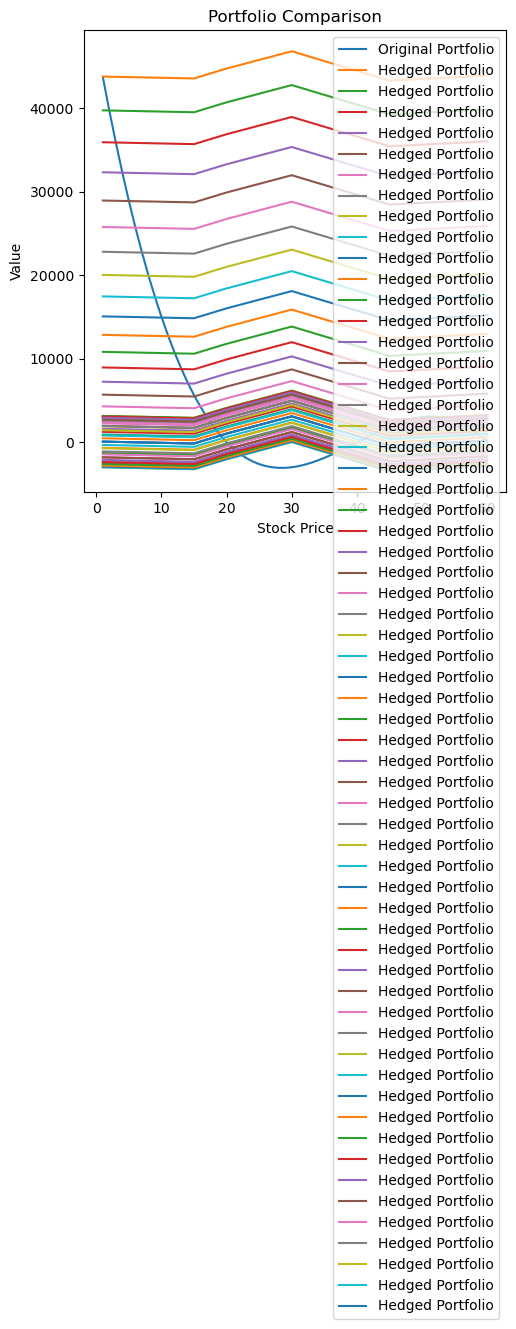

In [220]:
# Plot results
plt.figure(figsize=(12, 6))  # Corrected: Removed extra parenthesis

# Original vs Hedged Portfolio
plt.subplot(1, 2, 1)
plt.plot(stocks, portfolio, label='Original Portfolio')
plt.plot(stocks, after_surgery, label='Hedged Portfolio')
plt.title('Portfolio Comparison')
plt.xlabel('Stock Price')
plt.ylabel('Value')
plt.legend()

In [ ]:
"""
Essentially, fellas, we are going to short: 
    206.60567508 calls with the strike price of $15 
    -273.48442368 calls with the strike price of $45
    -46.98010183 puts with the strike price of $15

And, we are going to long: 
    440.49083973 calls with the strike price of $30 
    30.96415802 puts with the strike price of $20

We are shorting the edges and holding long the belly of the calls, so the portfolio is being hedged by a butterly of sorts. 
Likewise, the puts are in a bull spread configuration.
"""